# 单变量线性回归
## 1、可视化数据

读取数据

In [263]:
import pandas as pd

path = 'ex1data1.txt'

# header代表标题行，为None时代表无标题行，为0则代表第一行为标题行
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [264]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


可视化

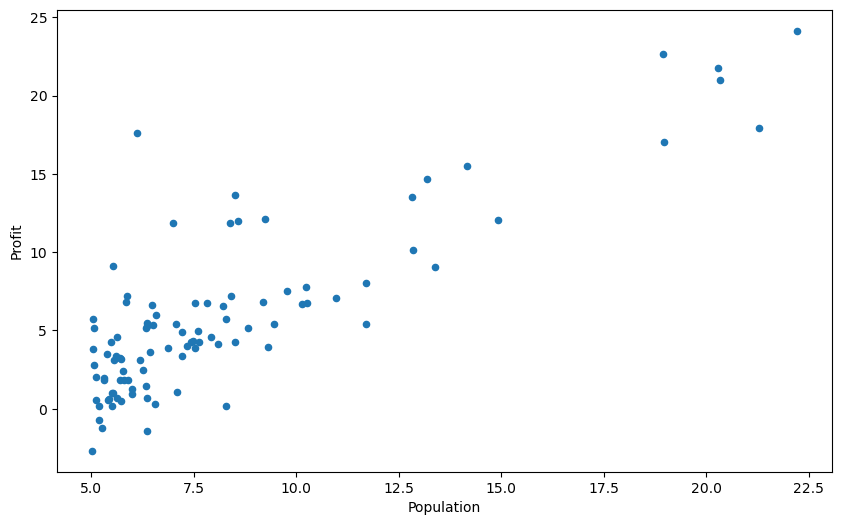

In [265]:
from matplotlib import pyplot as plt

data.plot(kind='scatter', x='Population', y='Profit', figsize=(10, 6))
plt.show()

## 2、梯度下降
首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$$\\{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [266]:
import numpy as np

def computeCost(X, y, theta):
    J = np.power(((X * theta.T) - y), 2)
    return np.sum(J) / (2 * len(X))

由于我们现在研究的是单变量线性，所以：
$$\\{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}$$
现在已知X，y，要得到假设函数的形式，我们需要将${\theta }$和X视为矩阵，方便计算结果

In [267]:
data.insert(0,'ones',1)

查看data的一些信息

In [268]:
print(data.shape)
print(data.shape[1])

(97, 3)
3


变量初始化

In [269]:
cols = data.shape[1]            # cols=3
X = data.iloc[:, 0:cols-1]      # X代表选取所有行，并且0~2列（2不取）
y = data.iloc[:, cols-1:cols]   # y代表选取所有行，并且2~3列（3不取）

In [270]:
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [271]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [272]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros((1, 2)))
theta

matrix([[0., 0.]])

In [273]:
# 查看维度
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [274]:
# 计算代价函数
computeCost(X, y, theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
梯度下降：
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
假设函数：
$$\\{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$$
损失（误差）：
$${loss}:={{{{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}}}}$$

# 公式推导过程
假设目标函数 $\( J(\theta) \)$ 是线性回归的均方误差：

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 $$

其中：
- $\( m \)$ 是样本的数量。
- $\( h_\theta(x) \)$ 是线性回归模型的预测输出，一般形式为 $\( h_\theta(x) = \theta^T x \)$。
- $\( y^{(i)} \)$ 是样本 $\( i \)$ 的实际值。

对目标函数 $\( J(\theta) \)$ 进行偏导数求解：

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{\partial}{\partial \theta_j} \left( \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 \right) $$

1. 对内部的平方项求导：

$$ \frac{\partial}{\partial \theta_j} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 = 2 \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( h_\theta(x^{(i)}) - y^{(i)} \right) $$

2. 对预测函数 $\( h_\theta(x) \)$ 求导：

$$ \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)}) = \frac{\partial}{\partial \theta_j} (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \cdots + \theta_n x_n^{(i)}) = x_j^{(i)} $$

3. 将这两个结果代入：

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{2m} \sum_{i=1}^{m} 2 \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)} $$

4. 化简结果：

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)} $$

将这个结果代入梯度下降的更新规则：

$$ \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} $$

具体表达为：

$$ \theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)} $$


In [275]:
def batchGradientDescent(X, y, theta, alpha, iterations):
    # 创建一个与 theta 形状相同的零矩阵
    temp = np.matrix(np.zeros(theta.shape))
    # 获取 theta 的参数数量
    parameters = int(theta.ravel().shape[1])
    # 初始化一个用于存储迭代次数的成本数组
    cost = np.zeros(iterations)
    
    
    for i in range(iterations):
        loss = (X * theta.T) - y
        
        # 遍历所有参数，并更新
        for j in range(parameters):
            # 偏导数的一部分
            term = np.multiply(loss, X[:,j])
            # 更新theta
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [276]:
alpha = 0.01
iterations = 1000

In [277]:
result_theta, cost = batchGradientDescent(X, y, theta, alpha, iterations)
result_theta

matrix([[-3.24140214,  1.1272942 ]])

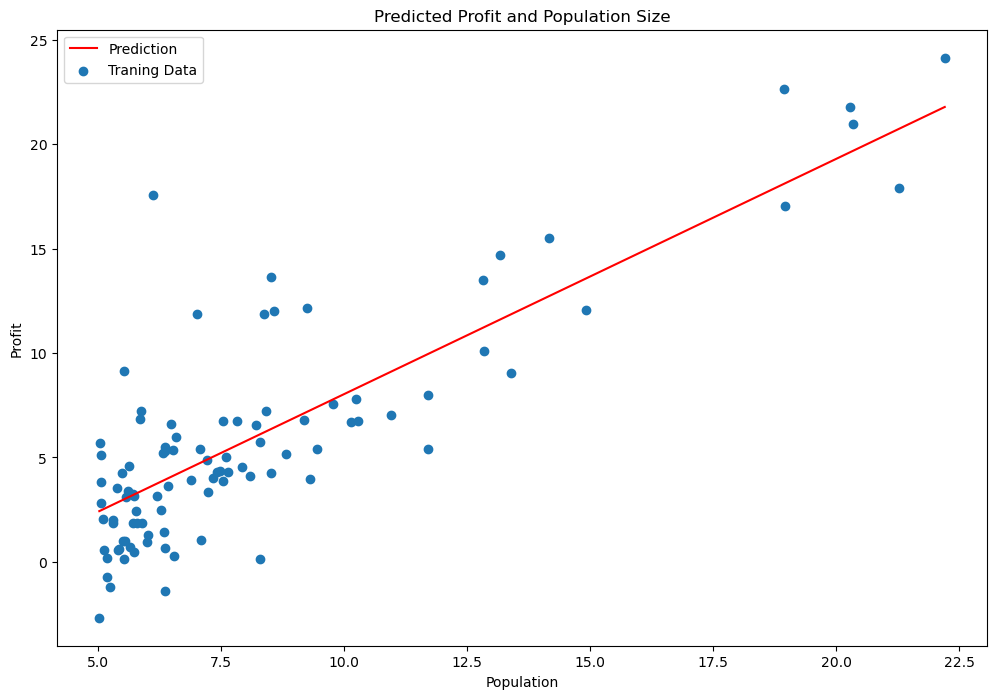

In [278]:
# 由于已经知道了拟合函数的参数result_theta，所以只需要生成x的值然后带入得到函数值，最后将其传入生成图像

# 在一个范围内生成均匀分布的数组
x = np.linspace(data.Population.min(), data.Population.max(), 100)
fitting_function = result_theta[0, 0] + (result_theta[0, 1] * x)

# plt.subplots创建子图，子图允许在同一图表窗口中显示多个图形
# fig代表整个图表，ax代表子图，一般只对ax进行操作，因为fig可以看作全局设置
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, fitting_function, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)

# 在多图设置时，也就是存在子图时，最好使用set_xlabel，set_title等
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit and Population Size')
plt.show()

上方只利用了梯度下降返回的result_theta，还有cost没有利用，所以接下来我们绘制代价函数图像(因为cost没有拟合，所以数据就是图像线条，不需要画散点图)

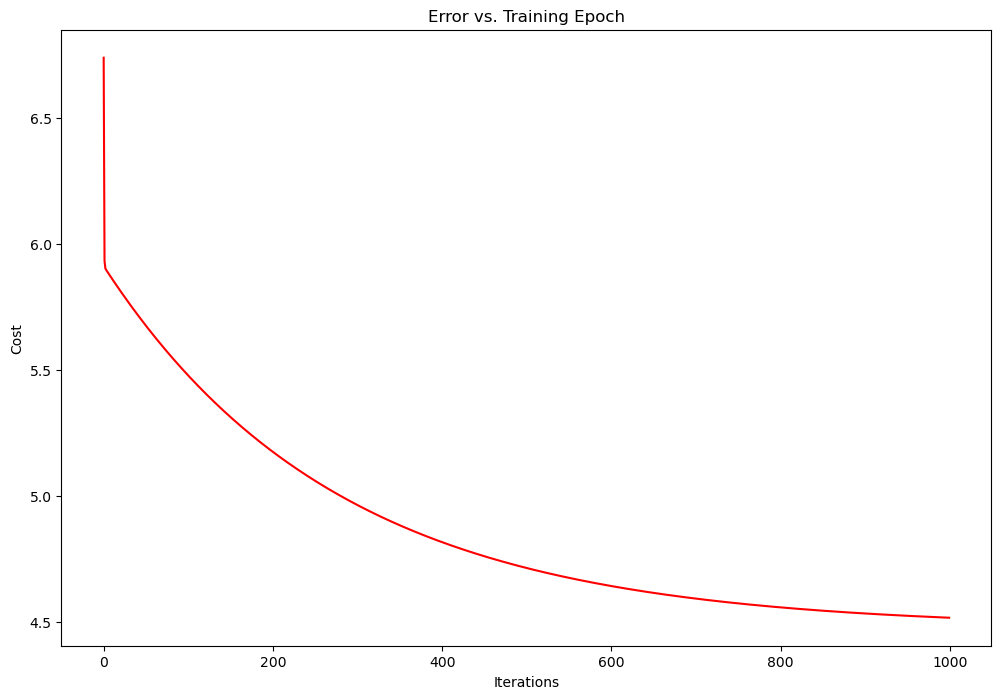

In [279]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

In [280]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


需要进行特征归一化（是一种预处理技术，用于将数据的不同特征缩放到一个相同的范围，以提升机器学习模型的性能和训练速度。不同特征可能有不同的量纲和范围，归一化可以消除这些差异，使模型更容易收敛，提升预测准确性）
下面使用的是特征归一化的标准化方法：
$$X' = \frac{X - \mu}{\sigma}$$
$$ \( X \) 是原始特征值$$
$$ \( \mu \) 是特征的均值$$
$$ \( \sigma \) 是特征的标准差$$

In [281]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [282]:
data2.insert(0, 'Ones', 1)

cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]        # 前三列作为x，因为房子大小和卧室数量是影响因素
y2 = data2.iloc[:, cols-1:cols]     # 最后一列作为y，因为我们最终是要预测房价

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.zeros((1, 3)))

result2_theta, cost2 = batchGradientDescent(X2, y2, theta2, alpha, iterations)

computeCost(X2, y2, result2_theta)

0.1307033696077189

In [283]:
result2_theta

matrix([[-1.10910099e-16,  8.78503652e-01, -4.69166570e-02]])

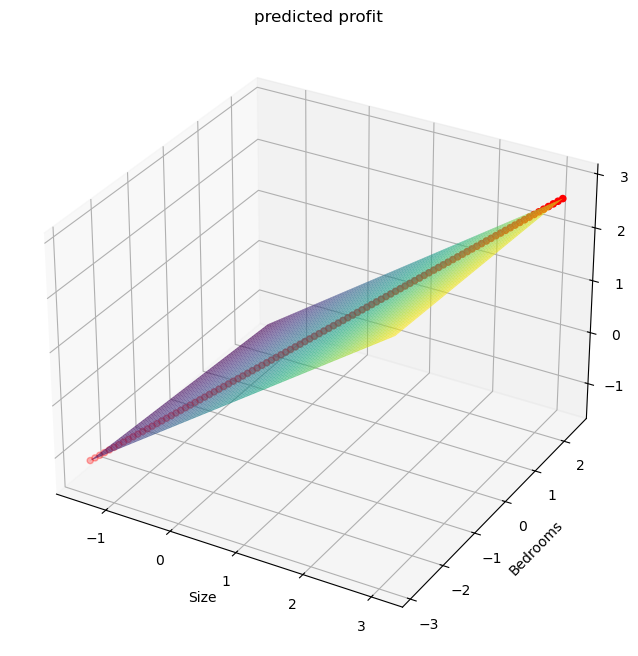

In [284]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x_1 = np.linspace(data2.Size.min(), data2.Size.max(), 100)
x_2 = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)

# 将 x_1 和 x_2 转换为网格矩阵 X 和 Y, X 和 Y 都是 100x100 的二维数组。
X, Y = np.meshgrid(x_1, x_2)

# 二维的结果
fitting_function2_2d = result2_theta[0, 0] + (result2_theta[0, 1] * X) + (result2_theta[0, 2] * Y)

# 绘制三维曲面图，绘制三维图像需要二维数据
surface = ax.plot_surface(X, Y, fitting_function2_2d, cmap='viridis', alpha=0.7)

# 一维的结果
fitting_function2_1d = result2_theta[0, 0] + (result2_theta[0, 1] * x_1) + (result2_theta[0, 2] * x_2)

# 绘制三维散点图，绘制三维散点需要一维数据
scatter = ax.scatter(x_1, x_2, fitting_function2_1d, c='r', marker='o')

# 设置标签
ax.set_title('predicted profit')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

plt.show()

loss函数图像

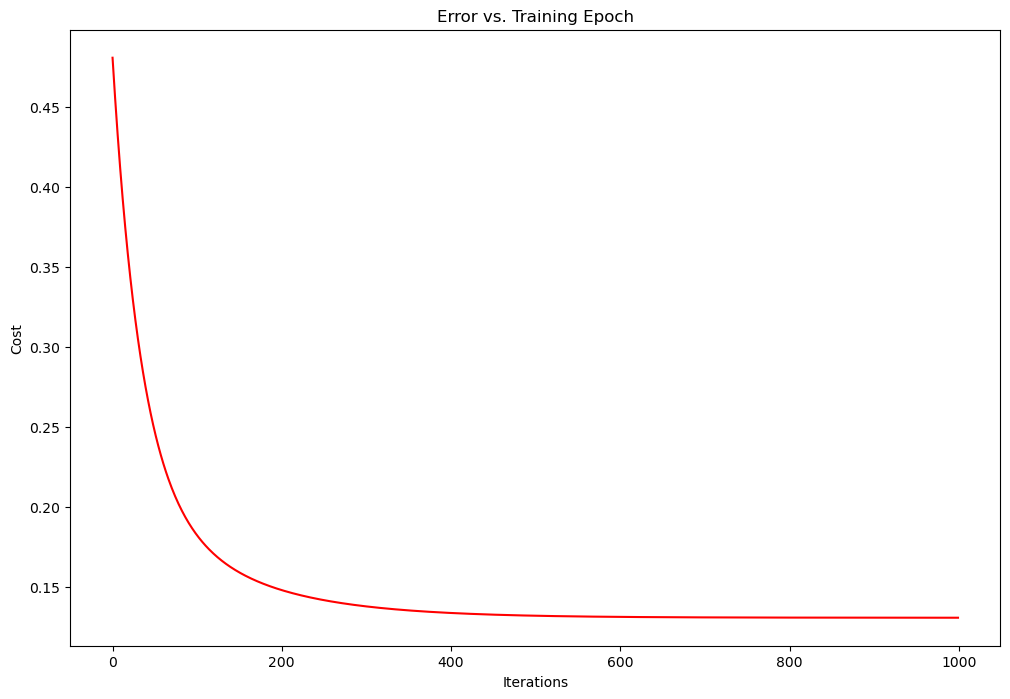

In [285]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()